# 2. Supervised Learning

A machine learning task where the desired output for new inputs is learnt from known input-output pairs.
* Regression: estimating the mapping from (continuous) input to output 
* Classification: identifying which category a sample belongs to, based on previous samples (training set) whose category is known

### Example: Classifying Sound Data with Support Vector Machine

In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn-darkgrid')

In [22]:
from sklearn.svm import SVC

features = ['zero_crossing_rate', 'spectral_centroid']
df = pd.read_csv('../data/cats_and_dogs.csv', index_col=0)

normalizer = MinMaxScaler()
model = SVC(kernel='linear', C=1e99)

df[features] = normalizer.fit_transform(df[features].values)
model.fit(df[features], df.animal);

In [23]:
def plot_decision_boundary(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1],
               linestyles=[':', '-', ':'])
    
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=120, marker='o', linewidth=1, facecolors='none', edgecolor='k');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

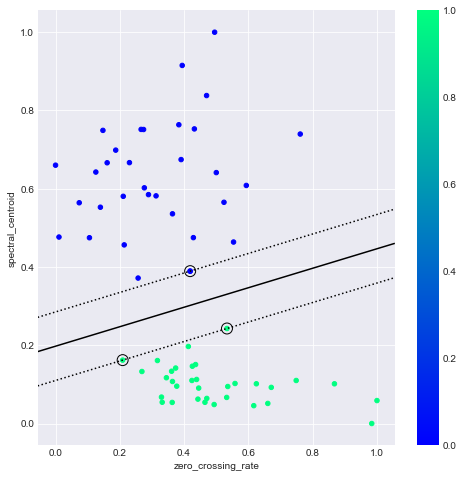

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
df.plot.scatter(*features, c=df.animal == 'dog', cmap='winter', ax=ax)
plot_decision_boundary(model, ax)

In [39]:
test_data = pd.read_csv('../data/test_cats_and_dogs.csv', index_col=0)
test_data

,filename,animal,spectral_centroid,zero_crossing_rate
name,,,,
cat,../data/test/cat.wav,cat,2273.977803,0.154522
dog,../data/test/dog.wav,dog,1156.978209,0.079116


In [35]:
import IPython.display as ipd
ipd.Audio(test_data.filename.iloc[0])

In [36]:
ipd.Audio(test_data.filename.iloc[1])

In [40]:
test_data[features] = normalizer.transform(test_data[features].values)
test_data['predicted_animal'] = model.predict(test_data[features])
test_data

,filename,animal,spectral_centroid,zero_crossing_rate,predicted_animal
name,,,,,
cat,../data/test/cat.wav,cat,0.441655,0.769331,cat
dog,../data/test/dog.wav,dog,0.091455,0.235005,dog


### Example: Non-Linear Classification With Suppor Vector Machine

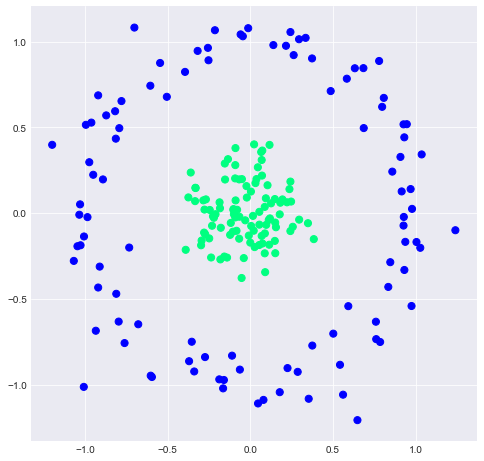

In [12]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(200, factor=.2, noise=.1)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

#### Cover's theorem

>A complex pattern-classification problem, cast in a high-dimensional space nonlinearly, is more likely to be linearly separable than in a low-dimensional space, provided that the space is not densely populated.

( Cover, T.M., Geometrical and Statistical properties of systems of linear inequalities with applications in pattern recognition, 1965)

In [13]:
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=fixed(X), y=fixed(y)):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
    ax.view_init(elev=elev, azim=azim)

interact(plot_3D);

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-30), IntSlider(value=30, descriptio…

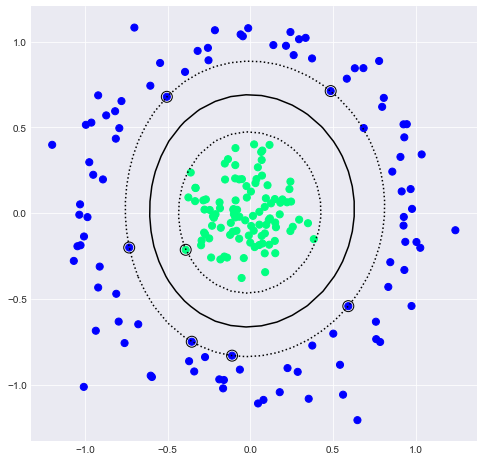

In [14]:
model = SVC(kernel='rbf', gamma='auto', C=1E99)
model.fit(X, y)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_decision_boundary(model, ax)